In [15]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [59]:
N = 10
P = 20

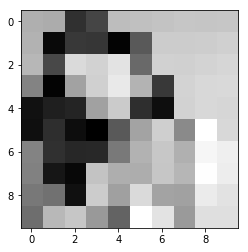

In [60]:
img = cv2.imread('./maudy.png', 0)
img = cv2.resize(img, (N,N))
imvec = np.reshape(np.array(img), (N*N,1))

def imshow(imgdata):
    plt.imshow(imgdata, cmap = 'gray')
    plt.show()

imshow(img)

In [61]:
def V(n, m, i, k):
    y = (2 * i + 1 - N) / N
    x = (2 * k + 1 - N) / N
    r = np.sqrt(x * x + y * y)
    t = np.arctan2(y, x)
    return np.exp(2 * np.pi * n * r * r * 1j + m * t * 1j)

def W(n, m, i, k):
    y = (2 * i + 1 - N) / N
    x = (2 * k + 1 - N) / N
    r = np.sqrt(x * x + y * y)
    t = np.arctan2(y, x)
    matW = np.exp(-2 * np.pi * n * r * r * 1j - m * t * 1j)
    c = r <= 1
    return c * matW

In [62]:
def createMatW():
    matN = np.ones((P,P))
    matM = np.ones((P,P))
    for i in range(P):
        matN[i,:] = i
        matM[:,i] = i
    matN = matN.reshape((P*P,1))
    matN = np.repeat(matN, N*N, axis=1)
    matM = matM.reshape((P*P,1))
    matM = np.repeat(matM, N*N, axis=1)

    matI = np.ones((N,N))
    matK = np.ones((N,N))
    for i in range(N):
        matI[i,:] = i
        matK[:,i] = i
    matI = matI.reshape((1,N*N))
    matI = np.repeat(matI, P*P, axis=0)
    matK = matK.reshape((1,N*N))
    matK = np.repeat(matK, P*P, axis=0)

    matW = 4 / (np.pi * N * N) * W(matN, matM, matI, matK)
    return matW

def createMatV():
    matN = np.ones((P,P))
    matM = np.ones((P,P))
    for i in range(P):
        matN[i,:] = i
        matM[:,i] = i
    matN = matN.reshape((1,P*P))
    matN = np.repeat(matN, N*N, axis=0)
    matM = matM.reshape((1,P*P))
    matM = np.repeat(matM, N*N, axis=0)

    matI = np.ones((N,N))
    matK = np.ones((N,N))
    for i in range(N):
        matI[i,:] = i
        matK[:,i] = i
    matI = matI.reshape((N*N,1))
    matI = np.repeat(matI, P*P, axis=1)
    matK = matK.reshape((N*N,1))
    matK = np.repeat(matK, P*P, axis=1)

    matV = V(matN, matM, matI, matK)
    return matV

In [63]:
matW = createMatW()

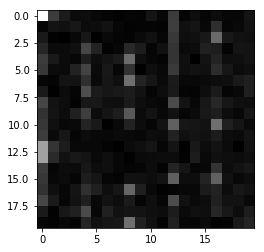

In [64]:
transformed = np.matmul(matW, imvec)
transformed_abs = np.abs(transformed)
transformed_abs_img = np.reshape(transformed_abs, (P, P))
imshow(transformed_abs_img)

In [65]:
matV = createMatV()

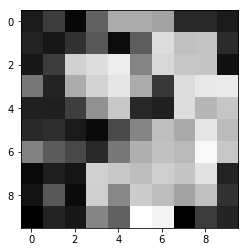

In [66]:
inversed = np.matmul(matV, transformed)
inversed_abs = np.abs(inversed)
inversed_abs_img = np.reshape(inversed_abs, (N,N))
imshow(inversed_abs_img)